In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams.update({'font.size': 12})
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pickle
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as sm
import pylab
import scipy.stats as stats
import math
import json as j
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
from textblob import TextBlob
from sklearn.model_selection import KFold

In [107]:
#Upload the data

disputes = pd.read_csv('Russia.csv')
df = pd.DataFrame(disputes)

df

,Unnamed: 0,iso3_o,exporter_name,iso3_d,importer_name,year,industry_id,industry_descr,broad_sector,trade,...,sanction_imposition_trade,gdp_wdi_cur_o,gdp_wdi_cap_cur_o,gdp_wdi_const_o,gdp_wdi_cap_const_o,gdp_wdi_cur_d,gdp_wdi_cap_cur_d,gdp_wdi_const_d,gdp_wdi_cap_const_d,disputes
0,1,RUS,Russia,KAZ,Kazakhstan,2000,18,Live Swine,Agriculture,0.060000,...,0.0,2.600000e+11,1771.597778,9.520000e+11,6491.085938,1.829199e+10,1229.000977,6.685117e+10,4491.591797,0
1,2,RUS,Russia,BLR,Belarus,2011,18,Live Swine,Agriculture,0.000000,...,0.0,2.050000e+12,14351.211910,1.590000e+12,11125.347660,6.175779e+10,6519.229980,6.030032e+10,6365.377930,0
2,3,RUS,Russia,DEU,Germany,2005,18,Live Swine,Agriculture,0.000000,...,0.0,7.640000e+11,5323.474121,1.280000e+12,8929.319336,2.850000e+12,34507.367190,3.200000e+12,38835.382810,0
3,4,RUS,Russia,FIN,Finland,2000,18,Live Swine,Agriculture,0.000000,...,0.0,2.600000e+11,1771.597778,9.520000e+11,6491.085938,1.260000e+11,24285.466800,2.090000e+11,40403.550780,0
4,5,RUS,Russia,MNG,Mongolia,2010,18,Live Swine,Agriculture,0.000000,...,0.0,1.520000e+12,10674.997070,1.520000e+12,10674.997070,7.189482e+09,2643.292969,7.189482e+09,2643.292969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,7018,RUS,Russia,NOR,Norway,2014,143,Railway/tramway locomotives & rolling stock,Manufacturing,0.000000,...,NaN,2.060000e+12,14100.730000,1.690000e+12,11573.500000,4.980000e+11,97019.180000,4.580000e+11,89175.500000,0
7018,7019,RUS,Russia,AUT,Austria,2001,143,Railway/tramway locomotives & rolling stock,Manufacturing,0.012314,...,0.0,3.070000e+11,2100.358000,1.000000e+12,6851.132000,1.970000e+11,24537.510000,3.410000e+11,42370.930000,0
7019,7020,RUS,Russia,SVK,Slovakia,2003,143,Railway/tramway locomotives & rolling stock,Manufacturing,0.469991,...,0.0,4.300000e+11,2975.133000,1.120000e+12,7767.424000,4.681659e+10,8712.699000,6.331554e+10,11783.200000,0
7020,7021,RUS,Russia,MYS,Malaysia,2006,143,Railway/tramway locomotives & rolling stock,Manufacturing,0.000000,...,0.0,9.900000e+11,6920.194000,1.390000e+12,9693.205000,1.630000e+11,6209.125000,2.160000e+11,8255.286000,0


In [108]:
df.describe()

,Unnamed: 0,year,industry_id,trade,flag_mirror,colony_of_destination_ever,colony_of_origin_ever,colony_ever,common_colonizer,common_legal_origin,...,sanction_imposition_trade,gdp_wdi_cur_o,gdp_wdi_cap_cur_o,gdp_wdi_const_o,gdp_wdi_cap_const_o,gdp_wdi_cur_d,gdp_wdi_cap_cur_d,gdp_wdi_const_d,gdp_wdi_cap_const_d,disputes
count,7022.000000,7022.000000,7022.000000,7022.000000,7022.000000,7022.0,7022.000000,7022.000000,7022.0,7022.000000,...,5784.000000,6.761000e+03,6761.000000,6.761000e+03,6761.000000,6.749000e+03,6749.000000,6.705000e+03,6705.000000,7022.000000
mean,3511.500000,2008.019653,101.302336,106.376129,0.133438,0.0,0.140558,0.140558,0.0,0.130874,...,0.006224,1.216196e+12,8452.979059,1.410796e+12,9788.454777,4.221734e+11,13007.955694,4.614540e+11,14406.505629,0.008972
std,2027.221128,4.889249,51.486148,1783.582513,0.340071,0.0,0.347590,0.347590,0.0,0.337287,...,0.078654,6.702671e+11,4671.235067,2.496872e+11,1750.366113,1.504603e+12,17899.533661,1.533115e+12,19010.149956,0.094300
min,1.000000,2000.000000,18.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,2.600000e+11,1771.597778,9.520000e+11,6491.085938,7.595113e+07,111.927200,1.222061e+08,194.873077,0.000000
25%,1756.250000,2004.000000,34.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,5.910000e+11,4102.372000,1.200000e+12,8360.267000,9.861560e+09,1251.821000,1.195995e+10,1626.623000,0.000000
50%,3511.500000,2008.000000,138.000000,0.005194,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,1.280000e+12,8745.375000,1.500000e+12,10535.130000,3.956629e+10,4623.729492,4.482590e+10,5606.853027,0.000000
75%,5266.750000,2012.000000,138.000000,0.547639,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,1.660000e+12,11635.274410,1.650000e+12,11282.060000,2.280000e+11,17025.530000,2.560000e+11,18568.363280,0.000000
max,7022.000000,2016.000000,143.000000,52249.570000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,...,1.000000,2.300000e+12,16007.090000,1.690000e+12,11699.970000,1.870000e+13,118823.648400,1.700000e+13,111968.400000,1.000000


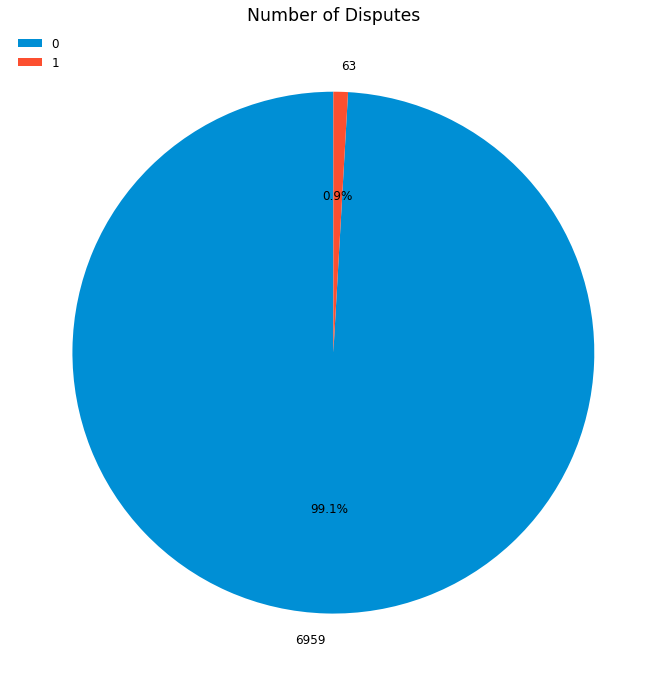

In [109]:
# See the number of disputes in the dataset

labels = df.disputes.value_counts().index
colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f']
shape = df.disputes.value_counts().values
plt.figure(figsize=(12,12))
plt.pie(shape, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels, loc='upper left', frameon=False)
plt.title('Number of Disputes')
plt.show()

In [110]:
#rename the dataframe and drop raw text data

cols_to_drop = ['Unnamed: 0','iso3_o', 'iso3_d', 'year', 'industry_id',
                'industry_descr', 'broad_sector', 'country_d', 'colony_of_destination_ever', 
                'colony_of_origin_ever', 'common_colonizer', 'common_legal_origin',
                'member_gatt_o', 'member_wto_o', 'member_eu_o', 'member_gatt_d', 'member_wto_d',
                'member_eu_d', 'lat_o', 'lng_o', 'lat_d', 'lng_d', 'landlocked_o', 'island_o', 'landlocked_d',
                'island_d', 'region_d', 'polity_o', 'polity_d', 'agree_pta_goods', 'agree_pta_services', 
                'agree_eia', 'agree_cu', 'agree_psa', 'agree_fta_eia', 'agree_cu_eia', 'gdp_pwt_const_o', 
                'pop_o', 'gdp_pwt_cur_o', 'capital_cur_o', 'capital_const_o', 'gdp_pwt_const_d', 'pop_d',
                'gdp_pwt_cur_d', 'capital_cur_d', 'capital_const_d', 'sanction_threat', 'sanction_threat_trade',
                'sanction_imposition', 'sanction_imposition_trade', 'gdp_wdi_cur_o', 'gdp_wdi_cap_cur_o', 
                'gdp_wdi_const_o', 'gdp_wdi_cap_const_o', 'gdp_wdi_cur_d', 'gdp_wdi_cap_cur_d', 'gdp_wdi_const_d',
                'gdp_wdi_cap_const_d','exporter_name','importer_name','flag_mirror','flag_zero','country_o',
               'dynamic_code_o','dynamic_code_d','region_o','hostility_level_o','hostility_level_d']

data_clean = df.drop(cols_to_drop, axis=1)
disputes = data_clean

In [111]:
disputes['trade_log'] = np.log(disputes.trade+1)
disputes['distance_log'] = np.log(disputes.distance)

disputes

,trade,colony_ever,contiguity,distance,member_gatt_joint,member_wto_joint,member_eu_joint,common_language,agree_fta,agree_pta,disputes,trade_log,distance_log
0,0.060000,1,1,2211.765869,0,0,0,1,1,1,0,0.058269,7.701547
1,0.000000,1,1,1855.455688,0,0,0,1,1,1,0,0.000000,7.525886
2,0.000000,0,0,3023.392822,0,0,0,0,0,0,0,0.000000,8.014135
3,0.000000,1,1,1990.992798,0,0,0,1,0,0,0,0.000000,7.596389
4,0.000000,0,1,3719.254639,0,0,0,1,0,0,0,0.000000,8.221279
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,0.000000,0,1,2731.499000,0,1,0,0,0,0,0,0.000000,7.912606
7018,0.012314,0,0,2840.310000,0,0,0,0,0,0,0,0.012239,7.951668
7019,0.469991,0,0,2618.144000,0,0,0,0,0,0,0,0.385256,7.870221
7020,0.000000,0,0,7455.031000,0,0,0,0,0,0,0,0.000000,8.916644


In [118]:
# Start regression analysis

#independent variable
xmat = disputes.drop(['trade','trade_log','distance'],axis=1)

#dependent variable
y = disputes['trade_log']

#train the data
X_train, X_test, y_train, y_test=train_test_split(xmat,y,test_size=0.3,random_state=3)

In [119]:
#Linear Regression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

#predicition and coeefitients
y_pred= reg.predict(X_test)

#LR Coefficients
Coeff = pd.DataFrame(columns=["Variable","Coefficient"])
Coeff["Variable"]=X_train.columns
Coeff["Coefficient"]=reg.coef_
Coeff.sort_values("Coefficient")

### Calculate RMSE
rmseLN = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmseLN

0.9869623445517419

In [120]:
### Taking a closer look at the estimates
X = sm.add_constant(X_train)
est = sm.OLS(y_train, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              trade_log   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     258.4
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:48:45   Log-Likelihood:                -7079.7
No. Observations:                4915   AIC:                         1.418e+04
Df Residuals:                    4906   BIC:                         1.424e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.4505      0.26

C:\Users\konda\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


C:\Users\konda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


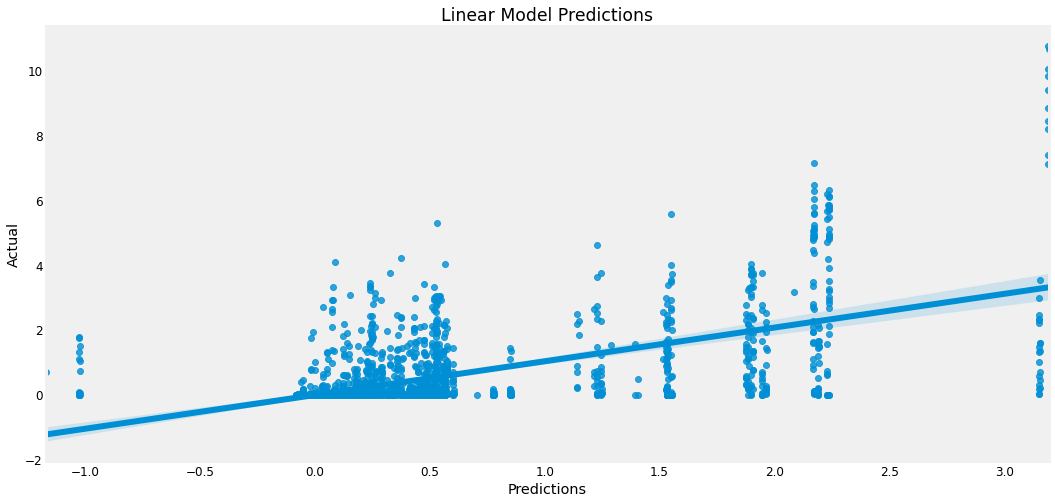

In [121]:
# let's check the accuracy of prediction on a graph

plt.figure(figsize=(16,8))
sns.regplot(y_pred,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.grid(False)
plt.show()

In [122]:
# Start regression analysis

#independent variable
xmat = disputes.drop(['trade','trade_log','distance'],axis=1)

#dependent variable
y = disputes['trade']

#train the data
X_train, X_test, y_train, y_test=train_test_split(xmat,y,test_size=0.3,random_state=3)

In [123]:
#Ridge Resression

ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
train_score = ridge.score(X_train,y_train)
test_score = ridge.score(X_test,y_test)
r_pred = ridge.predict(X_train) 
print(test_score)
print(train_score)

0.11132314182166847
0.16619211699570158


In [124]:
model = Ridge()

# define model evaluation method
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(xmat, y)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -352.462
Config: {'alpha': 0.0}


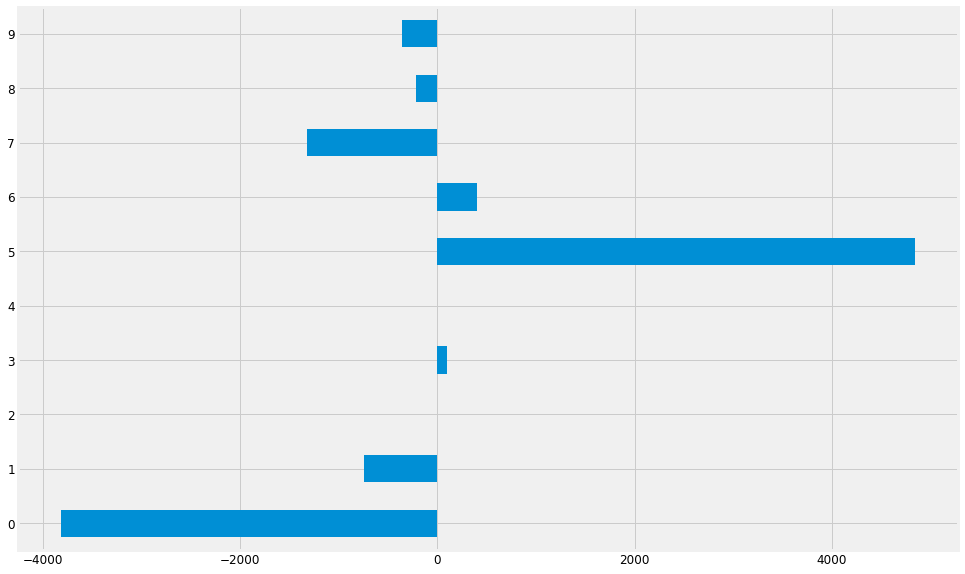

0   -3814.204519
1    -739.433802
2       0.000000
3      98.448297
4       0.000000
5    4845.454679
6     406.518912
7   -1319.070639
8    -219.385145
9    -354.987571
dtype: float64


In [125]:
plt.figure(figsize=(15,10))
important_coeff=pd.Series(ridge.coef_)
important_coeff.plot(kind="barh")
plt.show()
print(important_coeff)

In [126]:
#LASSO regression

lasso = Lasso(alpha=1.0)
lasso.fit(X_train,y_train)
train_score = lasso.score(X_train,y_train)
test_score = lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
ls_pred = lasso.predict(X_train) 

print(test_score)
print(train_score)

0.11124602101729786
0.16593768887179805


In [127]:
model = Lasso()

# define model evaluation method
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(xmat, y)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -351.690
Config: {'alpha': 0.99}


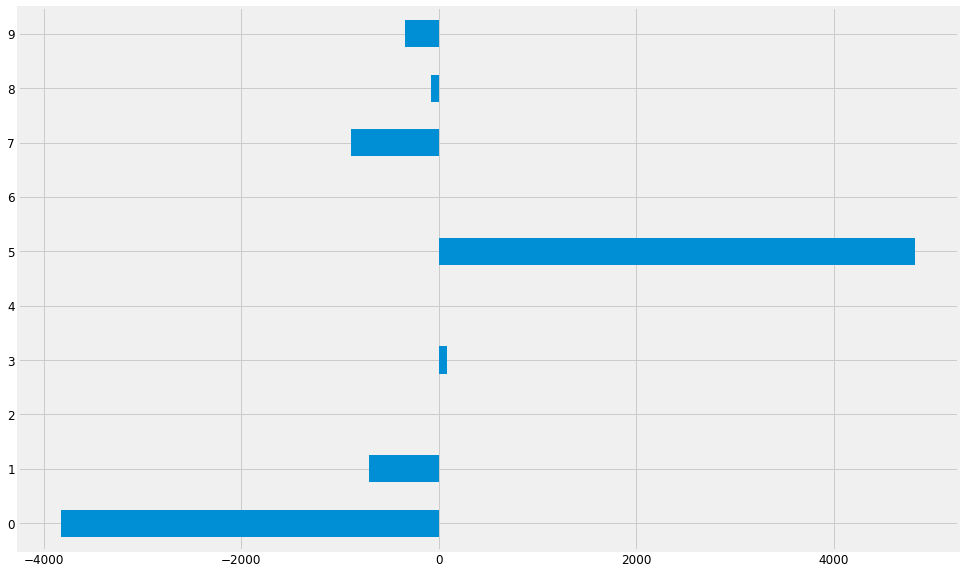

0   -3828.303951
1    -708.476162
2       0.000000
3      85.226358
4       0.000000
5    4827.089374
6       0.000000
7    -892.516823
8     -82.268699
9    -347.180848
dtype: float64


In [128]:
plt.figure(figsize=(15,10))
important_coeff=pd.Series(lasso.coef_)
important_coeff.plot(kind="barh")
plt.show()
print(important_coeff)

In [129]:
#ElasticNet

enet = ElasticNet(alpha=1.0)
enet.fit(X_train,y_train)
train_score=enet.score(X_train,y_train)
test_score=enet.score(X_test,y_test)
coeff_used = np.sum(enet.coef_!=0)
enethat = enet.predict(X_train)

print(test_score)
print(train_score)

0.014702729948227633
0.015803541429893153


In [130]:
model = ElasticNet()

# define model evaluation method
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(xmat, y)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -202.289
Config: {'alpha': 0.99}


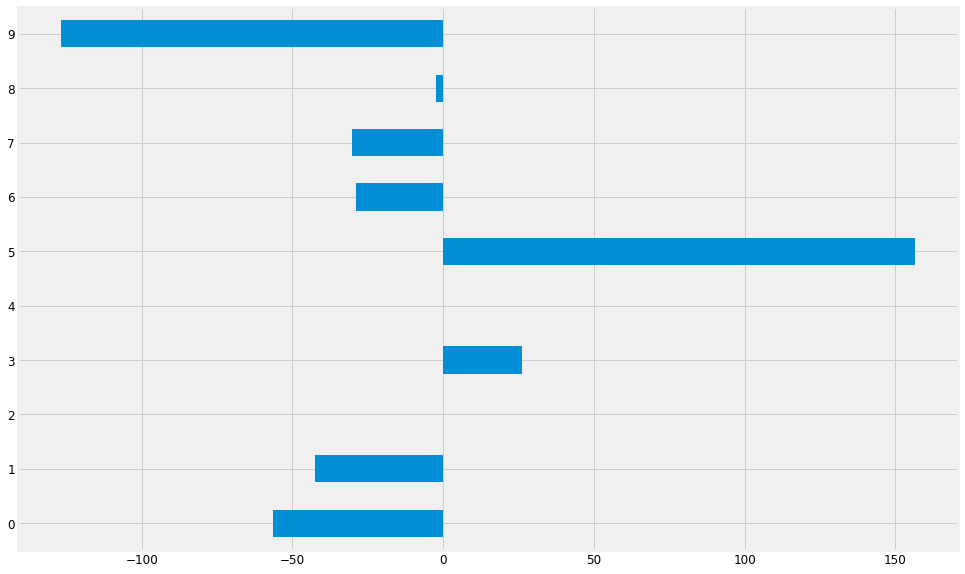

0    -56.285782
1    -42.661209
2      0.000000
3     26.299583
4      0.000000
5    156.583030
6    -28.924529
7    -30.289303
8     -2.235900
9   -126.762767
dtype: float64


In [131]:
plt.figure(figsize=(15,10))
important_coeff1=pd.Series(enet.coef_)
important_coeff1.plot(kind="barh")
plt.show()
print(important_coeff1)

In [132]:
print('---------------Linear ---------------------')

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
y_pred= reg.predict(X_train)
train_score=reg.score(X_train,y_train)
test_score=reg.score(X_test,y_test)
print(test_score)
print(train_score)

print('---------------Ridge ---------------------')

ridge_model = Ridge(alpha = 0.00)
ridge_model.fit(X_train, y_train)             
pred_ridge = ridge_model.predict(X_train)
train_score=ridge.score(X_train,y_train)
test_score=ridge.score(X_test,y_test)
print(test_score)
print(train_score)

print('---------------Lasso ---------------------')

Lasso_model = Lasso(alpha = 0.99)
Lasso_model.fit(X_train, y_train)
pred_Lasso = Lasso_model.predict(X_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
print(test_score)
print(train_score)

print('---------------Elastic Net ---------------------')

model_enet = ElasticNet(alpha = 0.99)
model_enet.fit(X_train, y_train) 
pred_enet= model_enet.predict(X_train)
train_score=enet.score(X_train,y_train)
test_score=enet.score(X_test,y_test)
print(test_score)

---------------Linear ---------------------
0.10976168676232645
0.16624369461036292
---------------Ridge ---------------------
0.11132314182166847
0.16619211699570158
---------------Lasso ---------------------
0.11124602101729786
0.16593768887179805
---------------Elastic Net ---------------------
0.014702729948227633


In [133]:
#Mean Absolute Error (MAE) shows the difference between predictions and actual values.
#Root Mean Square Error (RMSE) shows how accurately the model predicts the response.
#R^2 will be calculated to find the goodness of fit measure.


print('---------------Linear ---------------------')

print('MAE: %f'% mean_absolute_error(y_train, y_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_train, y_pred)))   
print('R2 %f' % r2_score(y_train, y_pred))



print('---------------Ridge ---------------------')

print('MAE: %f'% mean_absolute_error(y_train, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_train, pred_ridge)))   
print('R2 %f' % r2_score(y_train, pred_ridge))



print('---------------Lasso-----------------------')

print('MAE: %f' % mean_absolute_error(y_train, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_train, pred_Lasso)))
print('R2 %f' % r2_score(y_train, pred_Lasso))



print('---------------ElasticNet-------------------')

print('MAE: %f' % mean_absolute_error(y_train,pred_enet)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_train, pred_enet))) #RMSE
print('R2 %f' % r2_score(y_train, pred_enet))

---------------Linear ---------------------
MAE: 384.898003
RMSE: 1714.003201
R2 0.166244
---------------Ridge ---------------------
MAE: 384.898003
RMSE: 1714.003201
R2 0.166244
---------------Lasso-----------------------
MAE: 379.189125
RMSE: 1714.315619
R2 0.165940
---------------ElasticNet-------------------
MAE: 222.511100
RMSE: 1862.117971
R2 0.015920


In [134]:
print('---------------Linear ---------------------')

def MAPE(y_train,y_pred):
    mape = np.mean(np.abs((y_train - y_pred)/y_train))*100
    return mape

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
reg.fit(X_train,y_train)
train_score = reg.score(X_train,y_train)
test_score = reg.score(X_test,y_test)
y_pred = reg.predict(X_train) 
lm_MAPE = MAPE(y_train,y_pred)
print("MAPE value: ",lm_MAPE)
AccuracyLM = 100 - lm_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(AccuracyLM))



print('---------------Ridge ---------------------')

def MAPE(y_train,pred_ridge):
    mape = np.mean(np.abs((y_train - pred_ridge)/y_train))*100
    return mape

ridge = Ridge(alpha=0.99)
ridge.fit(X_train,y_train)
train_score = ridge.score(X_train,y_train)
test_score = ridge.score(X_test,y_test)
pred_ridge = ridge.predict(X_train) 
ridge_MAPE = MAPE(y_train,pred_ridge)
print("MAPE value: ",ridge_MAPE)
AccuracyRR = 100 - ridge_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(AccuracyRR))


print('---------------Lasso ---------------------')

def MAPE(y_train,pred_Lasso):
    mape = np.mean(np.abs((y_train - pred_Lasso)/y_train))*100
    return mape

lasso_model = Lasso(alpha=1.0)
lasso=lasso_model.fit(X_train , y_train)
lasso_predict = lasso.predict(X_train)
Lasso_MAPE = MAPE(y_train,lasso_predict)
print("MAPE value: ",Lasso_MAPE)
Accuracyls = 100 - Lasso_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracyls))


print('---------------Elastic Net ---------------------')

def MAPE(y_train,pred_enet):
    mape = np.mean(np.abs((y_train - pred_enet)/y_train))*100
    return mape

enet = ElasticNet(alpha=1.0)
enet = enet.fit(X_train , y_train)
enet_predict = enet.predict(X_train)
enet_MAPE = MAPE(y_train,enet_predict)
print("MAPE value: ",enet_MAPE)
Accuracyenet = 100 - enet_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracyenet))

---------------Linear ---------------------
MAPE value:  inf
Accuracy of Lasso Regression: -inf%.
---------------Ridge ---------------------
MAPE value:  inf
Accuracy of Lasso Regression: -inf%.
---------------Lasso ---------------------
MAPE value:  inf
Accuracy of Lasso Regression: -inf%.
---------------Elastic Net ---------------------
MAPE value:  inf
Accuracy of Lasso Regression: -inf%.


In [136]:
print('---------------Linear ---------------------')

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
y_pred= reg.predict(X_test)
train_score=reg.score(X_train,y_train)
test_score=reg.score(X_test,y_test)
print(test_score)
print(train_score)

print('---------------Ridge ---------------------')

ridge_model = Ridge(alpha = 0.00)
ridge_model.fit(X_train, y_train)             
pred_ridge = ridge_model.predict(X_test)
train_score=ridge.score(X_train,y_train)
test_score=ridge.score(X_test,y_test)
print(test_score)
print(train_score)

print('---------------Lasso ---------------------')

Lasso_model = Lasso(alpha = 0.99)
Lasso_model.fit(X_train, y_train)
pred_Lasso = Lasso_model.predict(X_test)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
print(test_score)
print(train_score)

print('---------------Elastic Net ---------------------')

model_enet = ElasticNet(alpha = 0.99)
model_enet.fit(X_train, y_train) 
pred_enet= model_enet.predict(X_test)
train_score=enet.score(X_train,y_train)
test_score=enet.score(X_test,y_test)
print(test_score)
print(train_score)

---------------Linear ---------------------
0.10976168676232645
0.16624369461036292
---------------Ridge ---------------------
0.11130869553020484
0.16619308748383643
---------------Lasso ---------------------
0.11124602101729786
0.16593768887179805
---------------Elastic Net ---------------------
0.014702729948227633
0.015803541429893153


In [137]:
#Mean Absolute Error (MAE) shows the difference between predictions and actual values.
#Root Mean Square Error (RMSE) shows how accurately the model predicts the response.
#R^2 will be calculated to find the goodness of fit measure.


print('---------------Linear ---------------------')

print('MAE: %f'% mean_absolute_error(y_test, y_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, y_pred)))   
print('R2 %f' % r2_score(y_test, y_pred))



print('---------------Ridge ---------------------')

print('MAE: %f'% mean_absolute_error(y_test, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_ridge)))   
print('R2 %f' % r2_score(y_test, pred_ridge))



print('---------------Lasso-----------------------')

print('MAE: %f' % mean_absolute_error(y_test, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_Lasso)))
print('R2 %f' % r2_score(y_test, pred_Lasso))



print('---------------ElasticNet-------------------')

print('MAE: %f' % mean_absolute_error(y_test,pred_enet)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_enet))) #RMSE
print('R2 %f' % r2_score(y_test, pred_enet))

---------------Linear ---------------------
MAE: 355.887851
RMSE: 1455.631311
R2 0.109762
---------------Ridge ---------------------
MAE: 355.887851
RMSE: 1455.631311
R2 0.109762
---------------Lasso-----------------------
MAE: 351.776318
RMSE: 1454.432968
R2 0.111227
---------------ElasticNet-------------------
MAE: 185.982009
RMSE: 1531.292590
R2 0.014810


In [138]:
print('---------------Linear ---------------------')

def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
reg.fit(X_train,y_train)
train_score = reg.score(X_train,y_train)
test_score = reg.score(X_test,y_test)
y_pred = reg.predict(X_test) 
lm_MAPE = MAPE(y_test,y_pred)
print("MAPE value: ",lm_MAPE)
AccuracyLM = 100 - lm_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(AccuracyLM))



print('---------------Ridge ---------------------')

def MAPE(y_test,pred_ridge):
    mape = np.mean(np.abs((y_test - pred_ridge)/y_test))*100
    return mape

ridge = Ridge(alpha=0.99)
ridge.fit(X_train,y_train)
train_score = ridge.score(X_train,y_train)
test_score = ridge.score(X_test,y_test)
pred_ridge = ridge.predict(X_test) 
ridge_MAPE = MAPE(y_test,pred_ridge)
print("MAPE value: ",ridge_MAPE)
AccuracyRR = 100 - ridge_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(AccuracyRR))


print('---------------Lasso ---------------------')

def MAPE(y_test,pred_Lasso):
    mape = np.mean(np.abs((y_test - pred_Lasso)/y_test))*100
    return mape

lasso_model = Lasso(alpha=1.0)
lasso=lasso_model.fit(X_train , y_train)
lasso_predict = lasso.predict(X_test)
Lasso_MAPE = MAPE(y_test,lasso_predict)
print("MAPE value: ",Lasso_MAPE)
Accuracyls = 100 - Lasso_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracyls))


print('---------------Elastic Net ---------------------')

def MAPE(y_test,pred_enet):
    mape = np.mean(np.abs((y_test - pred_enet)/y_test))*100
    return mape

enet = ElasticNet(alpha=1.0)
enet = enet.fit(X_train , y_train)
enet_predict = enet.predict(X_test)
enet_MAPE = MAPE(y_test,enet_predict)
print("MAPE value: ",enet_MAPE)
Accuracyenet = 100 - enet_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracyenet))

---------------Linear ---------------------
MAPE value:  inf
Accuracy of Lasso Regression: -inf%.
---------------Ridge ---------------------
MAPE value:  inf
Accuracy of Lasso Regression: -inf%.
---------------Lasso ---------------------
MAPE value:  inf
Accuracy of Lasso Regression: -inf%.
---------------Elastic Net ---------------------
MAPE value:  inf
Accuracy of Lasso Regression: -inf%.


In [139]:
# Random Forest Estimation (train data)

rf = RandomForestRegressor(n_estimators = 20, random_state = 20)
rf.fit(X_train, y_train)
predictions = rf.predict(X_train)
train_score = rf.score(X_train, y_train)
print(train_score)

0.840750599376835


In [140]:
# Random Forest Estimation (test data)

rf = RandomForestRegressor(n_estimators = 20, random_state = 20)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
test_score = rf.score(X_test, y_test)
print(test_score)

0.6614840838007028


In [141]:
# increase trees up to 100 to see how prediction changes (train data)

rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)
predictions = rf.predict(X_train)
train_score = rf.score(X_train, y_train)
print(train_score)

0.8410493866282355


In [142]:
# increase trees up to 100 to see how prediction changes (test data)

rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
test_score = rf.score(X_test, y_test)
print(test_score)

0.6603770146350516


In [143]:
# increase trees up to 200 to see how prediction changes (train data)

rf = RandomForestRegressor(n_estimators = 200, random_state = 20)
rf.fit(X_train, y_train)
predictions = rf.predict(X_train)
train_score = rf.score(X_train, y_train)
print(train_score)

0.8409508159399752


In [144]:
# increase trees up to 200 to see how prediction changes (test data)

rf = RandomForestRegressor(n_estimators = 200, random_state = 20)
rf.fit(X_train, y_train)
predictions = rf.predict(X_train)
test_score = rf.score(X_test, y_test)
print(test_score)

0.6613118489274844


In [145]:
#Random Forest Coesfficients

rf.feature_importances_
CoeffRF = pd.DataFrame(columns=["Variable","FeatureImportance"])
CoeffRF["Variable"]=X_train.columns
CoeffRF["FeatureImportance"]=rf.feature_importances_
CoeffRF.sort_values("FeatureImportance", ascending = False)

,Variable,FeatureImportance
9,distance_log,5.163658e-01
3,member_wto_joint,2.716765e-01
5,common_language,2.118623e-01
6,agree_fta,4.894905e-05
1,contiguity,3.872019e-05
7,agree_pta,7.629325e-06
8,disputes,5.262428e-08
0,colony_ever,1.938031e-08
2,member_gatt_joint,0.000000e+00
4,member_eu_joint,0.000000e+00


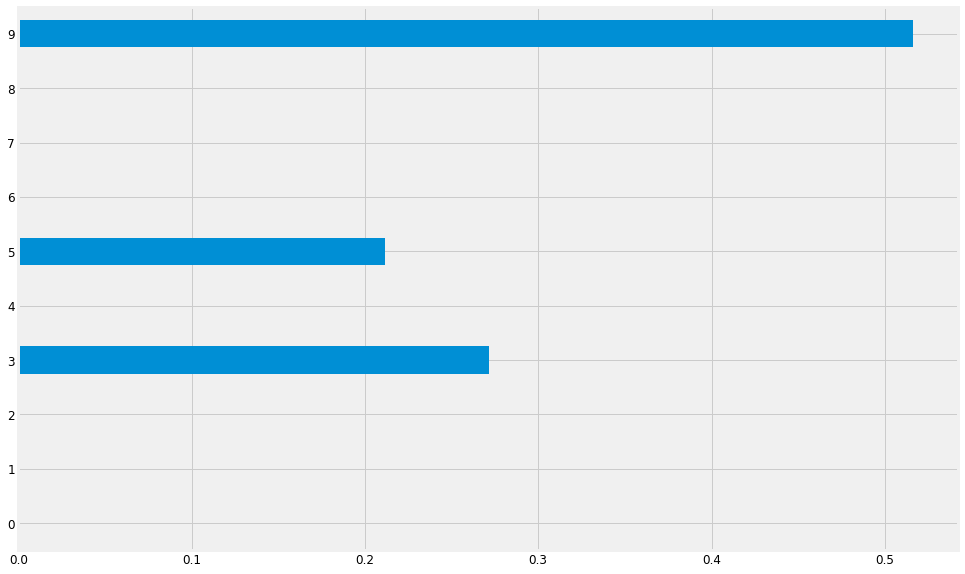

0    1.938031e-08
1    3.872019e-05
2    0.000000e+00
3    2.716765e-01
4    0.000000e+00
5    2.118623e-01
6    4.894905e-05
7    7.629325e-06
8    5.262428e-08
9    5.163658e-01
dtype: float64


In [146]:
plt.figure(figsize=(15,10))
important_coeff1=pd.Series(rf.feature_importances_)
important_coeff1.plot(kind="barh")
plt.show()
print(important_coeff1)

In [147]:
#Random Forest accuracy

def MAPE(y_test,pred):
    mape = np.mean(np.abs((y_test - pred)/y_test))*100
    return mape

rf_MAPE = MAPE(y_test,pred)
print("MAPE value: ",rf_MAPE)
Accuracyrf = 100 - rf_MAPE
print('Accuracy of RF Regression: {:0.2f}%.'.format(Accuracyrf))
print('MAE: %f' % mean_absolute_error(y_test, pred))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred)))
print('R2 %f' % r2_score(y_test, pred))

MAPE value:  inf
Accuracy of RF Regression: -inf%.
MAE: 55.057620
RMSE: 899.076789
R2 0.660377


In [148]:
#Random Forest accuracy

def MAPE(y_train,predictions):
    mape = np.mean(np.abs((y_train - predictions)/y_train))*100
    return mape

rf_MAPE = MAPE(y_train,predictions)
print("MAPE value: ",rf_MAPE)
Accuracyrf = 100 - rf_MAPE
print('Accuracy of RF Regression: {:0.2f}%.'.format(Accuracyrf))
print('MAE: %f' % mean_absolute_error(y_train, predictions))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_train, predictions)))
print('R2 %f' % r2_score(y_train, predictions))

MAPE value:  inf
Accuracy of RF Regression: -inf%.
MAE: 52.629472
RMSE: 748.613726
R2 0.840951


In [ ]:
#PPML Estimation

